# World Happiness Exploration

Luckily the 2022 year is comes to the end.

It's time to take stock - how happiness has been distributed between countries in recent years.

## Table of Content

1. [Common Settings and Imports](#common)
<br/>

2. [Data Preparation](#preparation)

  2.1. [Load Data](#preparation-load)

  2.2. [Process Data](#preparation-process)
<br/>

3. [Exploratory Data Analysis](#eda)

  3.1. [General Plots](#eda-general)

  3.2. [Explore Regions](#eda-regions)

  3.3. [Data on Map](#eda-map)

  3.4. [2022](#eda-2022)
<br/>

4. [Conclusions](#conclusions)

<a class="anchor" id="common"></a>

## 1. Common Settings and Imports

In [1]:
from sys import executable
!{executable} -m pip install colorcet

In [2]:
import numpy as np
import pandas as pd
import colorcet as cc
from PIL import Image

from lets_plot import *
from lets_plot.mapping import *
from lets_plot.geo_data import *
from lets_plot.bistro import *
LetsPlot.setup_html()

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).


In [3]:
PALETTE = "glasbey_hv"
HS_LOW, HS_HIGH = "#d73027", "#1a9850"
NEUTRAL_LIGHT, NEUTRAL_DARK = "#9ecae1", "#084594"

In [4]:
def bunch2(p1, p2, width=500, height=500):
    bunch = GGBunch()
    bunch.add_plot(p1, 0, 0, width, height)
    bunch.add_plot(p2, width, 0, width, height)
    return bunch.show()

<a class="anchor" id="preparation"></a>

## 2. Data Preparation

<a class="anchor" id="preparation-load"></a>

### 2.1. Load Data

In [5]:
def get_data(path):
    from os import listdir

    def read_csv(fname):
        year = int(fname.split(".")[0])
        return pd.read_csv("{0}/{1}".format(path, fname)).assign(year=year)

    return pd.concat([
        read_csv(fname) for fname in listdir(path)
    ], ignore_index=True)

In [6]:
raw_df = get_data("data/world_happiness_report")
print(raw_df.shape)
raw_df.head()

(1231, 52)


Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe             1.0            7.587   
1      Iceland  Western Europe             2.0            7.561   
2      Denmark  Western Europe             3.0            7.527   
3       Norway  Western Europe             4.0            7.522   
4       Canada   North America             5.0            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  ...  \
0                   0.94143  0.66557                        0.41978  ...   
1                   0.94784  0.62877                        0.14145  ...   
2                   0.87464  0.64938                        0.48357  ...   
3                   0.88521  0.66973                        0.36503  ...   
4                   0.90563  0.63297                        0.32957  ...   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                         NaN                       NaN   
1                                         NaN                       NaN   
2                                         NaN                       NaN   
3                                         NaN                       NaN   
4                                         NaN                       NaN   

   Explained by: Perceptions of corruption  Dystopia + residual  RANK  \
0                                      NaN                  NaN   NaN   
1                                      NaN                  NaN   NaN   
2                                      NaN                  NaN   NaN   
3                                      NaN                  NaN   NaN   
4                                      NaN                  NaN   NaN   

   Happiness score  Whisker-high  Whisker-low  Dystopia (1.83) + residual  \
0              NaN           NaN          NaN                         NaN   
1              NaN           NaN          NaN                         NaN   
2              NaN           NaN          NaN                         NaN   
3              NaN           NaN          NaN                         NaN   
4              NaN           NaN          NaN                         NaN   

   Explained by: GDP per capita  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                           NaN  

[5 rows x 52 columns]

<a class="anchor" id="preparation-process"></a>

### 2.2. Process Data

In [7]:
raw_df.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      315.000000       315.000000      158.000000   
mean        79.238095         5.378949        0.047885   
std         45.538922         1.141531        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.000000         4.510000        0.037268   
50%         79.000000         5.286000        0.043940   
75%        118.500000         6.269000        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                315.000000  470.000000                315.000000   
mean                   0.899837    0.990347                  0.594054   
std                    0.410780    0.318707                  0.240790   
min                    0.000000    0.000000                  0.000000   
25%                    0.594900    0.793000                  0.419645   
50%                    0.973060    1.025665                  0.640450   
75%                    1.229000    1.228745                  0.787640   
max                    1.824270    1.610574                  1.025250   

          Freedom  Trust (Government Corruption)   Generosity  \
count  470.000000                     315.000000  1084.000000   
mean     0.402828                       0.140532     0.153545   
std      0.150356                       0.115490     0.167592   
min      0.000000                       0.000000    -0.300907   
25%      0.297615                       0.061315     0.064828   
50%      0.418347                       0.106130     0.162140   
75%      0.516850                       0.178610     0.252000   
max      0.669730                       0.551910     0.838075   

       Dystopia Residual  ...  Perceptions of corruption  Ladder score  \
count         315.000000  ...                 613.000000    302.000000   
mean            2.212032  ...                   0.416267      5.502645   
std             0.558728  ...                   0.340490      1.092111   
min             0.328580  ...                   0.000000      2.523000   
25%             1.884135  ...                   0.082000      4.769400   
50%             2.211260  ...                   0.306000      5.524500   
75%             2.563470  ...                   0.780623      6.248375   
max             3.837720  ...                   0.939000      7.842000   

       Standard error of ladder score  upperwhisker  lowerwhisker  \
count                      302.000000    302.000000    302.000000   
mean                         0.056111      5.612629      5.392641   
std                          0.020292      1.074850      1.110534   
min                          0.025902      2.596000      2.449000   
25%                          0.042000      4.885588      4.636008   
50%                          0.052321      5.610132      5.426829   
75%                          0.066000      6.362124      6.136381   
max                          0.173000      7.904000      7.780000   

       Logged GDP per capita  Ladder score in Dystopia  \
count             302.000000                302.000000   
mean                9.363053                  2.198127   
std                 1.180595                  0.229201   
min                 6.492642                  1.972317   
25%                 8.483295                  1.972317   
50%                 9.514612                  1.972317   
75%                10.356000                  2.430000   
max                11.647000                  2.430000   

       Explained by: Log GDP per capita  Dystopia + residual        RANK  
count                        302.000000           302.000000  147.000000  
mean                           0.922248             2.198290   74.000000  
std                            0.391830             0.595958   42.579338  
min                            0.000000             0.257241    1.000000  
25%                            0.633963             1

There are many columns that are only partially filled. Firstly we will fix the `"Country"` column.

In [8]:
fixed_df = raw_df.copy()

fixed_df["Country"] = fixed_df["Country"].fillna(fixed_df["Country or region"]).fillna(fixed_df["Country name"])
fixed_df.drop(columns=["Country or region", "Country name"], inplace=True)
fixed_df = fixed_df[fixed_df["Country"] != "xx"]
fixed_df = fixed_df[~fixed_df["Country"].str.contains("\*").astype(bool)]
country_vc = fixed_df["Country"].value_counts()
fixed_df = fixed_df[fixed_df["Country"].isin(country_vc[country_vc == country_vc.max()].index)]

print(fixed_df.shape)
fixed_df.head()

(936, 50)


Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe             1.0            7.587   
1      Iceland  Western Europe             2.0            7.561   
2      Denmark  Western Europe             3.0            7.527   
3       Norway  Western Europe             4.0            7.522   
4       Canada   North America             5.0            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  ...  \
0                   0.94143  0.66557                        0.41978  ...   
1                   0.94784  0.62877                        0.14145  ...   
2                   0.87464  0.64938                        0.48357  ...   
3                   0.88521  0.66973                        0.36503  ...   
4                   0.90563  0.63297                        0.32957  ...   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                         NaN                       NaN   
1                                         NaN                       NaN   
2                                         NaN                       NaN   
3                                         NaN                       NaN   
4                                         NaN                       NaN   

   Explained by: Perceptions of corruption  Dystopia + residual  RANK  \
0                                      NaN                  NaN   NaN   
1                                      NaN                  NaN   NaN   
2                                      NaN                  NaN   NaN   
3                                      NaN                  NaN   NaN   
4                                      NaN                  NaN   NaN   

   Happiness score  Whisker-high  Whisker-low  Dystopia (1.83) + residual  \
0              NaN           NaN          NaN                         NaN   
1              NaN           NaN          NaN                         NaN   
2              NaN           NaN          NaN                         NaN   
3              NaN           NaN          NaN                         NaN   
4              NaN           NaN          NaN                         NaN   

   Explained by: GDP per capita  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                           NaN  

[5 rows x 50 columns]

In [9]:
nonnan_cols = {
    year: set(fixed_df[fixed_df.year == year].dropna(axis=1).columns)
    for year in fixed_df.year.unique()
}
set.intersection(*nonnan_cols.values())

{'Country', 'year'}

There are still too few fulfilled columns.

In [10]:
print(
    "\n\n".join([
        "Non-nan columns in {0}: {1}".format(year, ", ".join(['"{0}"'.format(col) for col in cols]))
        for year, cols in nonnan_cols.items()
    ])
)

Non-nan columns in 2015: "Happiness Score", "Dystopia Residual", "Economy (GDP per Capita)", "Freedom", "Happiness Rank", "Standard Error", "Generosity", "Health (Life Expectancy)", "Family", "Trust (Government Corruption)", "Region", "Country", "year"

Non-nan columns in 2016: "Upper Confidence Interval", "Happiness Score", "Dystopia Residual", "Economy (GDP per Capita)", "Freedom", "Happiness Rank", "Generosity", "Lower Confidence Interval", "Health (Life Expectancy)", "Family", "Trust (Government Corruption)", "Region", "Country", "year"

Non-nan columns in 2017: "Health..Life.Expectancy.", "Economy..GDP.per.Capita.", "Trust..Government.Corruption.", "Happiness.Score", "Whisker.low", "Whisker.high", "Freedom", "Happiness.Rank", "Dystopia.Residual", "Generosity", "Family", "Country", "year"

Non-nan columns in 2018: "Score", "GDP per capita", "Social support", "Overall rank", "Generosity", "Freedom to make life choices", "Healthy life expectancy", "Country", "year"

Non-nan columns i

It turns out that the same data is spread across different columns. So we will fix it.

In [11]:
# Copy the raw data
df = fixed_df.copy()
# Fix country column name
df.rename(columns={"Country": "country"}, inplace=True)
# Region column
df["region"] = df["country"].replace(df[["country", "Region"]].set_index("country").dropna().to_dict()["Region"])
# Happiness score column
df["happiness_score"] = df["Happiness Score"].fillna(df["Happiness.Score"])\
                                             .fillna(df["Score"])\
                                             .fillna(df["Ladder score"])\
                                             .fillna(df["Happiness score"])\
                                             .astype(str).str.replace(",", ".").astype(float)
# Happiness rank column
df.sort_values(by=["year", "happiness_score"], ascending=[True, False], inplace=True)
df["happiness_rank"] = df.groupby("year").cumcount() + 1
# Drop extra columns
df = df[["year", "country", "region", "happiness_rank", "happiness_score"]]
# Sort values
df = df.sort_values(by=["year", "happiness_rank"]).reset_index(drop=True)
# Print the result
print(df.shape)
df.head()

(936, 5)


year      country          region  happiness_rank  happiness_score
0  2015  Switzerland  Western Europe               1            7.587
1  2015      Iceland  Western Europe               2            7.561
2  2015      Denmark  Western Europe               3            7.527
3  2015       Norway  Western Europe               4            7.522
4  2015       Canada   North America               5            7.427

Also we save info about years.

In [12]:
years = df.year.unique()
years

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [13]:
years_range = [years.min(), years.max()]
years_range

[2015, 2022]

<a class="anchor" id="eda"></a>

## 3. Exploratory Data Analysis

<a class="anchor" id="eda-general"></a>

### 3.1. General Plots

In [14]:
top_n = 7

top_df = df[df.happiness_rank <= top_n]
color_replace = {country: cc.palette[PALETTE][i] for i, country in enumerate(top_df.country.unique())}
top_df = top_df.assign(color=top_df.country.replace(color_replace))

print(top_df.shape)
top_df.head()

(56, 6)


year      country          region  happiness_rank  happiness_score    color
0  2015  Switzerland  Western Europe               1            7.587  #2fa1da
1  2015      Iceland  Western Europe               2            7.561  #fb4f2f
2  2015      Denmark  Western Europe               3            7.527  #e4ae38
3  2015       Norway  Western Europe               4            7.522  #6d904f
4  2015       Canada   North America               5            7.427  #8a8a8a

In [15]:
bottom_n = 7

bottom_df = df.sort_values(by=["happiness_rank", "year"]).iloc[-len(years)*bottom_n:].sort_values(by=["year", "happiness_rank"])
color_replace = {country: cc.palette[PALETTE][top_n + i] for i, country in enumerate(bottom_df.country.unique())}
bottom_df = bottom_df.assign(color=bottom_df.country.replace(color_replace))

print(bottom_df.shape)
bottom_df.head()

(56, 6)


year       country              region  happiness_rank  happiness_score  \
110  2015      Tanzania  Sub-Saharan Africa             111            3.781   
111  2015        Guinea  Sub-Saharan Africa             112            3.656   
112  2015   Ivory Coast  Sub-Saharan Africa             113            3.655   
113  2015  Burkina Faso  Sub-Saharan Africa             114            3.587   
114  2015   Afghanistan       Southern Asia             115            3.575   

       color  
110  #d62628  
111  #1f77b3  
112  #e277c1  
113  #8c564b  
114  #bcbc21

In [16]:
rank_df = df[["year", "country", "happiness_rank"]].pivot(index="country", columns="year", values="happiness_rank")[years_range]
rank_df.columns = years_range
rank_df["progress"] = rank_df[years_range[1]] - rank_df[years_range[0]]
rank_df["trend"] = np.where(rank_df.progress == 0, 0, rank_df.progress / np.abs(rank_df.progress)).astype(int)
rank_df.sort_values(by="progress", ascending=False, inplace=True)
rank_df.reset_index(inplace=True)

print(rank_df.shape)
rank_df.head()

(117, 5)


country  2015  2022  progress  trend
0  Venezuela    21    90        69      1
1     Zambia    69   111        42      1
2     Jordan    66   108        42      1
3   Pakistan    65   102        37      1
4    Lebanon    81   116        35      1

In [17]:
ggplot(df, aes("year", "happiness_score")) + \
    geom_violin(color=NEUTRAL_DARK, fill=NEUTRAL_LIGHT) + \
    geom_boxplot(color=NEUTRAL_DARK, width=.2) + \
    scale_x_continuous(breaks=years) + \
    ylab("happiness score") + \
    ggtitle("Happiness score density through the years") + \
    theme_minimal() + theme(axis_tooltip_x='blank')

Over time, the median happiness score slowly increases. Its distribution also tends to up.

In [18]:
p1 = ggplot(top_df, aes("year", "happiness_rank", color="color")) + \
    geom_line(size=1) + \
    geom_point(size=4, tooltips=layer_tooltips().line("@|@country")) + \
    scale_x_continuous(breaks=years) + \
    scale_y_continuous(name="happiness rank", trans="reverse", \
                       breaks=top_df.happiness_rank.unique()) + \
    scale_color_identity() + \
    ggtitle("Top {0} countries by happiness rank".format(top_n)) + \
    theme_minimal() + theme(axis_tooltip='blank')
p2 = ggplot(top_df) + \
    geom_pie(aes(fill=as_discrete("color", order_by='..count..')), \
             hole=.25, stroke=1, stroke_color="black", \
             tooltips=layer_tooltips().title("@country")\
                     .format("@..count..", "d").line("count|@..count..")) + \
    facet_wrap(facets="happiness_rank") + \
    scale_fill_identity() + \
    ggtitle("Share of each of top {0} countries in each value of happiness rank".format(top_n)) + \
    theme_classic() + theme(axis='blank')

bunch2(p1, p2)

Among the top happiest countries Norway has the worst trend and Finland - the best.

Finland is most often in the first place, Denmark is in the second, Iceland is in the third; other cases are more varied.

It's looks like the top consists of Scandinavian countries predominantly.

In [19]:
p1 = ggplot(bottom_df, aes("year", "happiness_rank", color="color")) + \
    geom_line(size=1) + \
    geom_point(size=4, tooltips=layer_tooltips().line("@|@country")) + \
    scale_x_continuous(breaks=years) + \
    scale_y_continuous(name="happiness rank", trans="reverse", \
                       breaks=bottom_df.happiness_rank.unique()) + \
    scale_color_identity() + \
    ggtitle("Bottom {0} countries by happiness rank".format(bottom_n)) + \
    theme_minimal() + theme(axis_tooltip='blank')
p2 = ggplot(bottom_df) + \
    geom_pie(aes(fill=as_discrete("color", order_by='..count..')), \
             hole=.25, stroke=1, stroke_color="black", \
             tooltips=layer_tooltips().title("@country")\
                     .format("@..count..", "d").line("count|@..count..")) + \
    facet_wrap(facets="happiness_rank") + \
    scale_fill_identity() + \
    ggtitle("Share of each of bottom {0} countries in each value of happiness rank".format(bottom_n)) + \
    theme_classic() + theme(axis='blank')

bunch2(p1, p2)

Among the less happiest countries there is no such constancy. Except Tanzania and Afghanistan.

Also, Afghanistan more often than others is in the last place.

In [20]:
ggplot(pd.concat([rank_df.head(top_n), rank_df.tail(bottom_n)])) + \
    geom_segment(aes(y=str(years_range[0]), yend=str(years_range[1]), color=as_discrete("trend")), \
                 x=years_range[0], xend=years_range[1], arrow=arrow()) + \
    geom_point(aes(y=str(years_range[0]), color=as_discrete("trend")), x=years_range[0], \
               tooltips=layer_tooltips().title("@country").line("@|@progress")) + \
    geom_point(aes(y=str(years_range[1]), color=as_discrete("trend")), x=years_range[1], \
               tooltips=layer_tooltips().title("@country").line("@|@progress")) + \
    scale_x_continuous(name="years", breaks=years_range) + \
    scale_y_continuous(name="happiness rank", trans="reverse") + \
    scale_color_manual(values=[HS_LOW, HS_HIGH]) + \
    ggtitle("Extreme {0} countries by happiness rank change".format(top_n + bottom_n)) + \
    ggsize(600, 800) + \
    theme_minimal() + theme(legend_position='none')

This plot reflects the countries with the sharpest increases/decreases in happiness rank over the past 8 years.

The best trend is observed in Romania, the worst - in Venezuela.

<a class="anchor" id="eda-regions"></a>

### 3.2. Explore Regions

In [21]:
ggplot(df) + \
    geom_boxplot(aes(as_discrete("region", order_by="..middle.."), "happiness_score"), \
                 color=NEUTRAL_DARK, fill=NEUTRAL_LIGHT) + \
    ylab("happiness score") + \
    ggtitle("Happiness score main aggregation values by region") + \
    ggsize(600, 600) + \
    theme_minimal()

Despite the fact that the maximum values of happiness are achieved in Western Europe, on average the Australian region is happier.

In [22]:
regions_df = df.groupby("region").agg({"country": "count", "happiness_score": ["mean", "std"]})
regions_df = regions_df.droplevel(0, axis=1).reset_index()
regions_df["count"] = (regions_df["count"] / years.size).astype(int)
regions_df["explode"] = np.where(regions_df["mean"] < 5, 1/3, 0)
regions_df.sort_values(by="count", ascending=False, inplace=True)

print(regions_df.shape)
regions_df.head()

(10, 5)


region  count      mean       std   explode
1       Central and Eastern Europe     24  5.538956  0.589009  0.000000
8               Sub-Saharan Africa     21  4.414707  0.633909  0.333333
9                   Western Europe     19  6.846412  0.701921  0.000000
3      Latin America and Caribbean     18  6.065798  0.533900  0.000000
4  Middle East and Northern Africa     13  5.407890  0.938793  0.000000

In [23]:
ggplot(regions_df) + \
    geom_pie(aes(slice="count", fill="mean", explode="explode"), stat='identity', \
             stroke=1, stroke_color="black", size=40, \
             labels=layer_labels(["mean"]).format("@mean", ".3f"), \
             tooltips=layer_tooltips().title("@region")\
                                      .line("countries count|@count")\
                                      .format("@mean", ".3f").line("happiness score mean|@mean")\
                                      .format("@std", ".3f").line("happiness score std|@std")) + \
    scale_fill_gradient(name="mean happiness score", low=HS_LOW, high=HS_HIGH) + \
    ggtitle("Happiness score by region with countries counts") + \
    ggsize(800, 800) + \
    theme_classic() + theme(axis='blank')

The happiest regions have only a few countries, so it's harder to distort their statistic.

The Western Europe looks obviously good and the opposite is true for the Southern Asia and Sub-Saharan Africa.

<a class="anchor" id="eda-map"></a>

### 3.3. Data on Map

In [24]:
def map_plot(data, year):
    local_df = data[data.year == year]
    countries = geocode_countries(data.country.unique()).inc_res().get_boundaries()
    return ggplot() + \
        geom_livemap(zoom=1) + \
        geom_map(aes(fill="happiness_score"), data=local_df, map=countries, map_join="country", \
                 size=0, alpha=.5, tooltips=layer_tooltips().title("@country")\
                                                            .line("happiness_score|^fill")) + \
        scale_fill_gradient(name="happiness score", low=HS_LOW, high=HS_HIGH, \
                            limits=[data.happiness_score.min(), data.happiness_score.max()]) + \
        ggtitle("Happiness score for each country in {0}".format(year)) + \
        theme(legend_position='bottom')

width, height = 500, 500
bunch = GGBunch()
bunch.add_plot(map_plot(df, df.year.min()), 0, 0, width, height)
bunch.add_plot(map_plot(df, df.year.max()), width, 0, width, height)
bunch.show()

It's remarkable that around Afghanistan there is no other such dishapy countries.

<a class="anchor" id="eda-2022"></a>

### 3.4. 2022

Let's explore 2022 closer.

Here we will use additional data that affects to happiness score.

In [25]:
df_2022 = fixed_df[fixed_df.year == 2022][[
    "Country", "Happiness score", "Explained by: Healthy life expectancy",
    "Explained by: Perceptions of corruption", "Explained by: Social support", "Explained by: Generosity"
]].sort_values(by="Happiness score", ascending=False).reset_index(drop=True)
df_2022.columns = ["country", "happiness_score", "healthy_life_expectancy", \
                   "perceptions_of_corruption", "social_support", "generosity"]
for col in set(df_2022.columns) - set(["country"]):
    df_2022[col] = df_2022[col].astype(str).str.replace(",", ".").astype(float)
print(df_2022.shape)
df_2022.head()

(117, 6)


country  happiness_score  healthy_life_expectancy  \
0      Finland            7.821                    0.775   
1      Denmark            7.636                    0.777   
2      Iceland            7.557                    0.803   
3  Switzerland            7.512                    0.822   
4  Netherlands            7.415                    0.787   

   perceptions_of_corruption  social_support  generosity  
0                      0.534           1.258       0.109  
1                      0.532           1.243       0.188  
2                      0.191           1.320       0.270  
3                      0.461           1.226       0.147  
4                      0.419           1.206       0.271

In [26]:
corr_plot(df_2022.corr(numeric_only=True))\
    .tiles(type='full').labels(type='full', color="black")\
    .palette_gradient(low="#d53e4f", mid="#ffffbf", high="#3288bd")\
    .build() + \
    ggtitle("Correlations between numeric values") + \
    ggsize(800, 600)

Social support is most important thing that affects to the happiness score, while generosity hasn't affected at all.

In [27]:
id_vars = ["country", "happiness_score"]
ggplot(pd.melt(df_2022, id_vars=id_vars, value_vars=set(df_2022.columns) - set(id_vars)), \
       aes("happiness_score", "value", color="variable", fill="variable")) + \
    geom_point() + \
    geom_smooth(method='loess') + \
    facet_wrap(facets="variable") + \
    scale_color_brewer(name="social parameter", type='qual', palette="Set1") + \
    scale_fill_brewer(name="social parameter", type='qual', palette="Set1") + \
    xlab("happiness score") + ylab("social parameter value") + \
    ggtitle("Non-linear dependency between happiness score and different social parameters") + \
    theme_minimal()

Still happiness score non-linearly related with each one of the considering social parameters.

<a class="anchor" id="conclusions"></a>

## 4. Conclusions

During the years happiness slightly increase and concentrate in the west world countries.

The greatest positive changes are observed in the Balkans.

Conversely, there negative trends can be observed in Southern Asia, especially in the Afghanistan. Considering the fact that the largest drop in the happiness index showed by the Venezuela.

Let's hope that in the future there will be more happiness in the world than we have seen before.


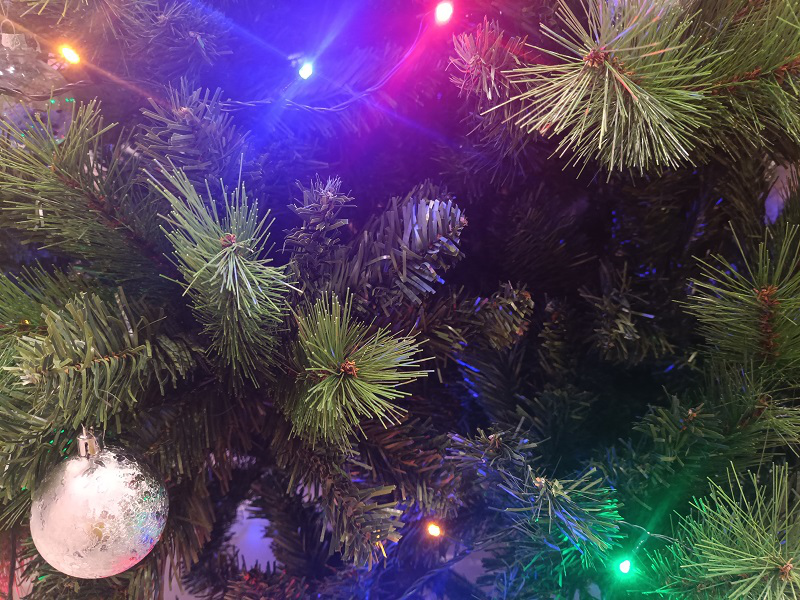

In [28]:
ggplot() + \
    geom_imshow(np.asarray(Image.open("images/christmas_tree.jpg"))) + \
    geom_text(x=400, y=-50, label="Happy New Year!", \
              family="Times New Roman", fontface='bold italic', \
              size=20, color="#006d2c") + \
    ylim(-100, 600) + \
    ggsize(800, 600) + \
    theme_classic() + theme(axis='blank')